In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.var.modules.var_commons import convert_dates_with_mappings, load_and_prepare_data

DATA_DIR="../../../data/labeling/output"
OUTLETS = ["24sata", "dnevnik", "jutarnji", "vecernji", "index"]

READ_OUTLETS = ["24sata", "dnevnik", "vecernji", "jutarnji", "index"]


In [2]:
# merge READ_OUTLETS results into 1 dataframe
df = None
for outlet in READ_OUTLETS:
    current_outlet_path = os.path.join(DATA_DIR, f"{outlet}.csv")
    current_outlet_df = pd.read_csv(current_outlet_path)
    if df is None:
        df = current_outlet_df
    else:
        df = pd.concat([current_outlet_df, df], axis=0)

# PAZI NA OVU LINIJU DA NE OTKOMENTIRAŠ SLUČAJNO!
#df = df[df['Impact'] >= 4]

#outlet_path = os.path.join(DATA_DIR, "dnevnik.csv")
#df = pd.read_csv(outlet_path)

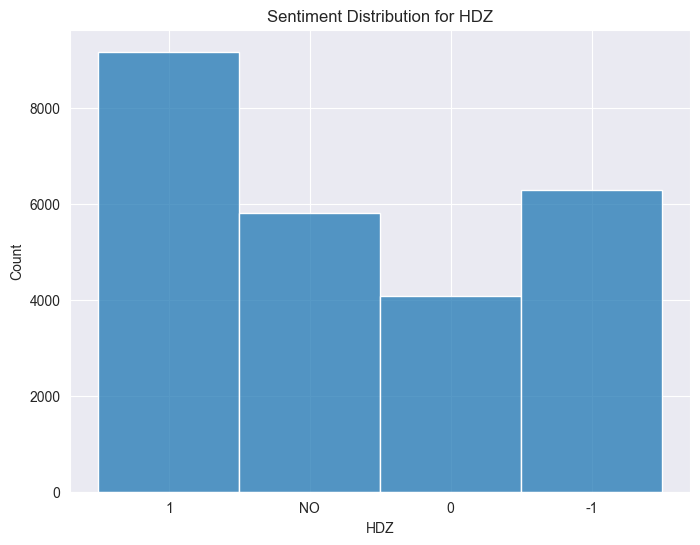

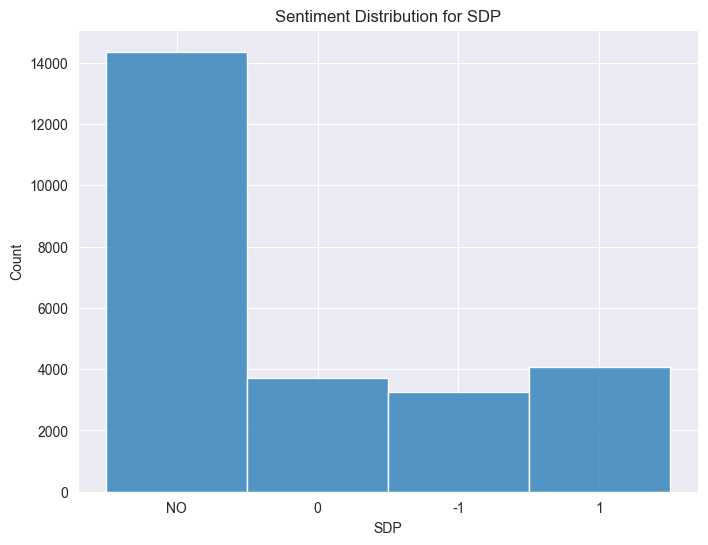

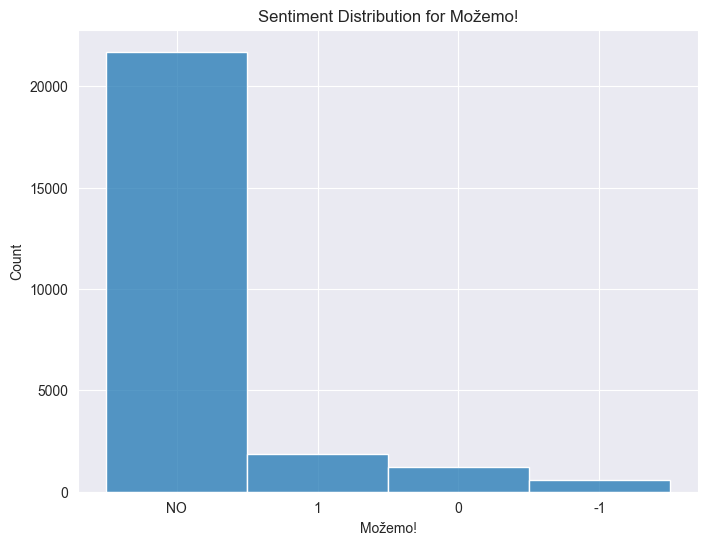

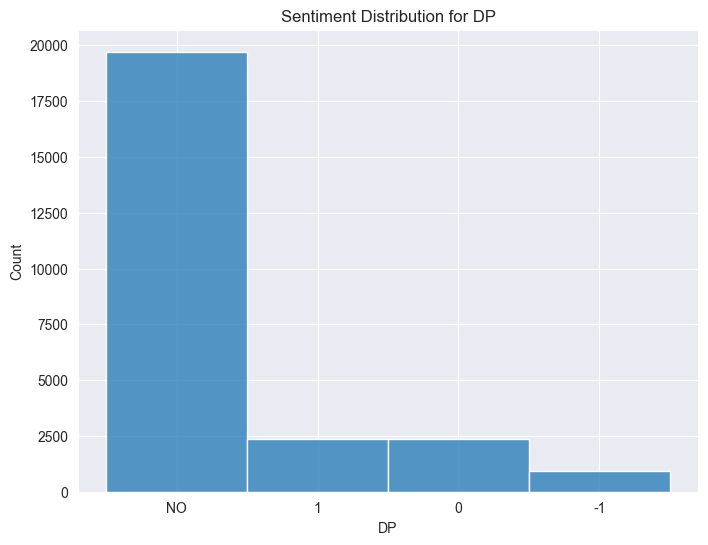

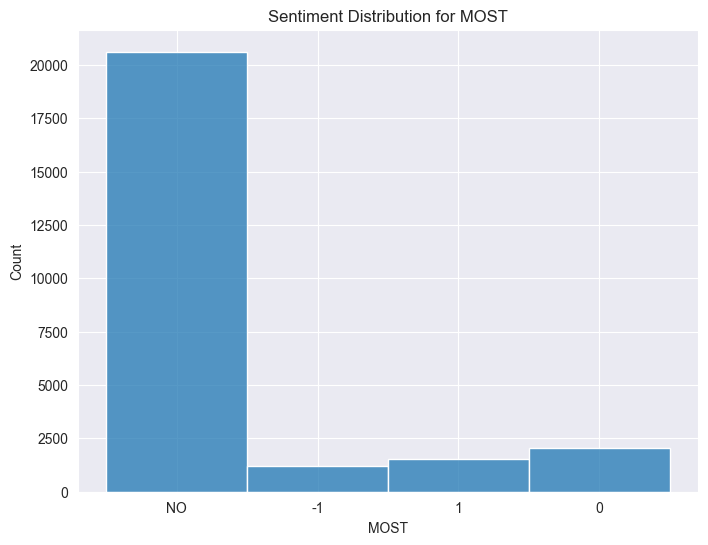

In [3]:
# Plot the distribution of sentiment for each party
parties = ['HDZ', 'SDP', 'Možemo!', 'DP', 'MOST']
sentiment_order = [-1, 0, 1, 'NO']
for party in parties:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=party, kde=False, bins=sentiment_order, discrete=True)
    plt.title(f'Sentiment Distribution for {party}')
plt.show()

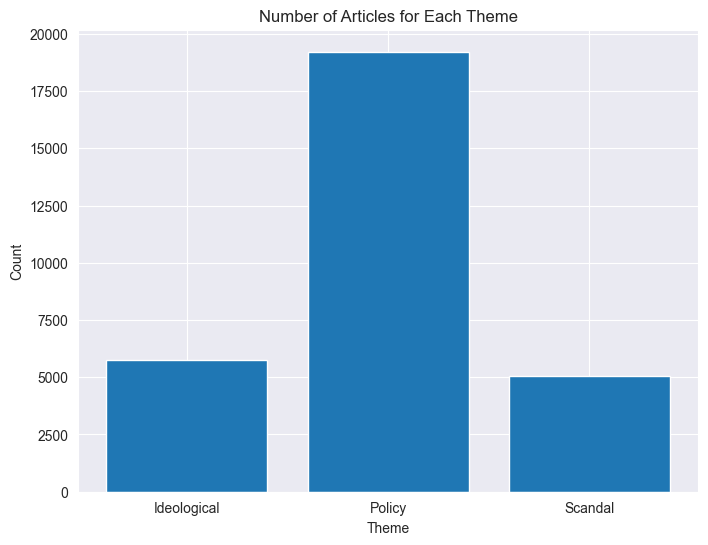

In [4]:
# Define the themes
themes = ['Ideological', 'Policy', 'Scandal']

# Initialize a list to store the counts
counts = []

# For each theme, count the number of articles that are labeled as '1'
for theme in themes:
    counts.append(df[df[theme] == 1].shape[0])

# Create a bar plot
plt.figure(figsize=(8,6))
plt.bar(themes, counts)
plt.title('Number of Articles for Each Theme')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.show()


In [5]:
# convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# create a new column for the year and month
df['year_month'] = df['date'].dt.to_period('M')

# initialize an empty dataframe to store the mean sentiments
mean_sentiments_df = pd.DataFrame()
mean_sentiments_weighted_df = pd.DataFrame()

#for each party, calculate the mean sentiment for each month
for party in parties:
    df[party] = pd.to_numeric(df[party], errors='coerce')
    mean_sentiments_df[party] = df.groupby('year_month')[party].mean()

df["Impact"] = pd.to_numeric(df["Impact"], errors='coerce')

# weighted sentiment by article impact
for party in parties:
    df[party] = pd.to_numeric(df[party], errors='coerce')
    mean_sentiments_weighted_df[party] = (df[party] * df['Impact']).groupby(df['year_month']).sum() / df['Impact'].groupby(df['year_month']).sum()

mean_sentiments_df.to_csv(os.path.join(DATA_DIR, "mean_sentiments.csv"))
mean_sentiments_weighted_df.to_csv(os.path.join(DATA_DIR, "mean_sentiments_weighted.csv"))

mean_sentiments_df.reset_index(inplace=True)
mean_sentiments_weighted_df.reset_index(inplace=True)

mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-05,0.124535,-0.012739,0.473684,0.465517,0.132812
1,2020-06,0.152344,-0.013237,0.574194,0.370370,0.184314
2,2020-07,0.518201,-0.092692,0.540541,0.292276,0.095238
3,2020-08,0.360947,0.210000,0.562500,0.344828,0.250000
4,2020-09,0.206452,0.126126,0.480000,0.359223,0.109756
5,2020-10,0.015337,0.131579,0.289474,0.280303,0.131148
6,2020-11,0.217073,0.107296,0.377778,0.369231,-0.247059
7,2020-12,0.188623,0.134694,0.355556,0.345133,-0.009615
8,2021-01,-0.068834,0.128405,0.390625,0.032787,0.060606
9,2021-02,0.220310,0.239437,0.365854,0.345794,0.120968


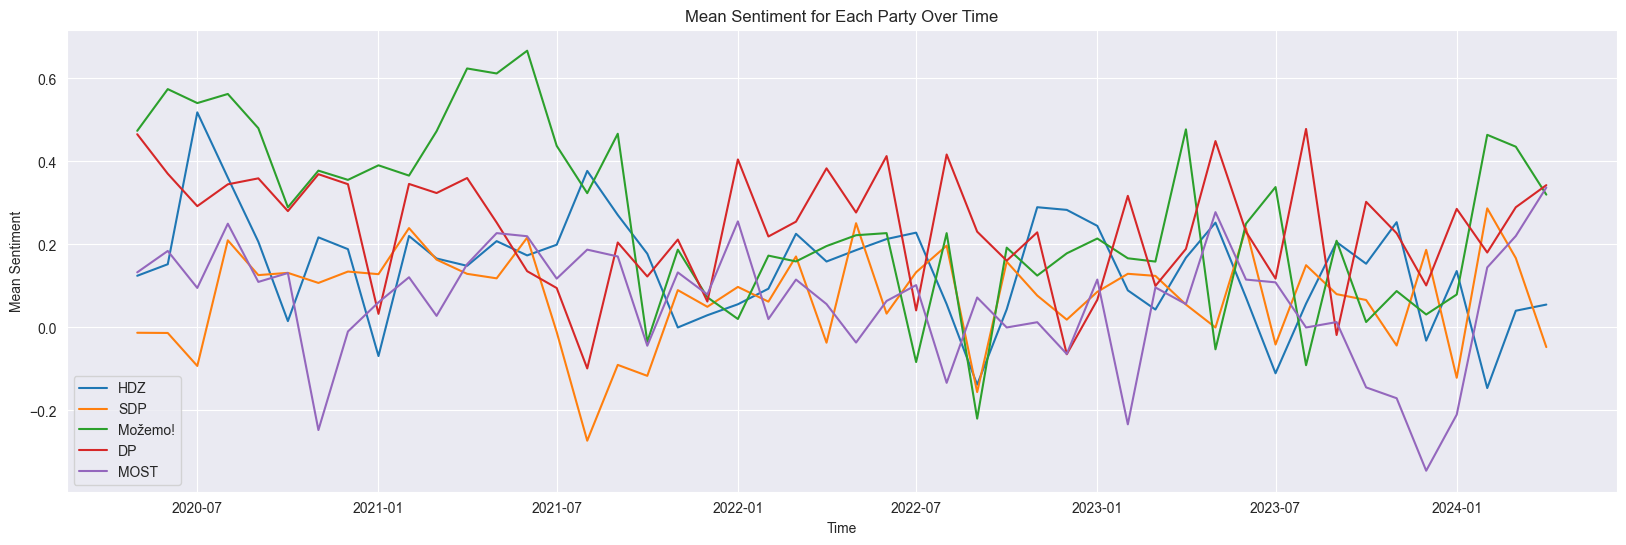

In [6]:
mean_sentiments_df['year_month'] = mean_sentiments_df['year_month'].dt.to_timestamp()

# For each party, plot a line plot of the mean sentiment over time
plt.figure(figsize=(20,6))
for party in parties:
    plt.plot(mean_sentiments_df['year_month'], mean_sentiments_df[party], label=party)

plt.title('Mean Sentiment for Each Party Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.show()

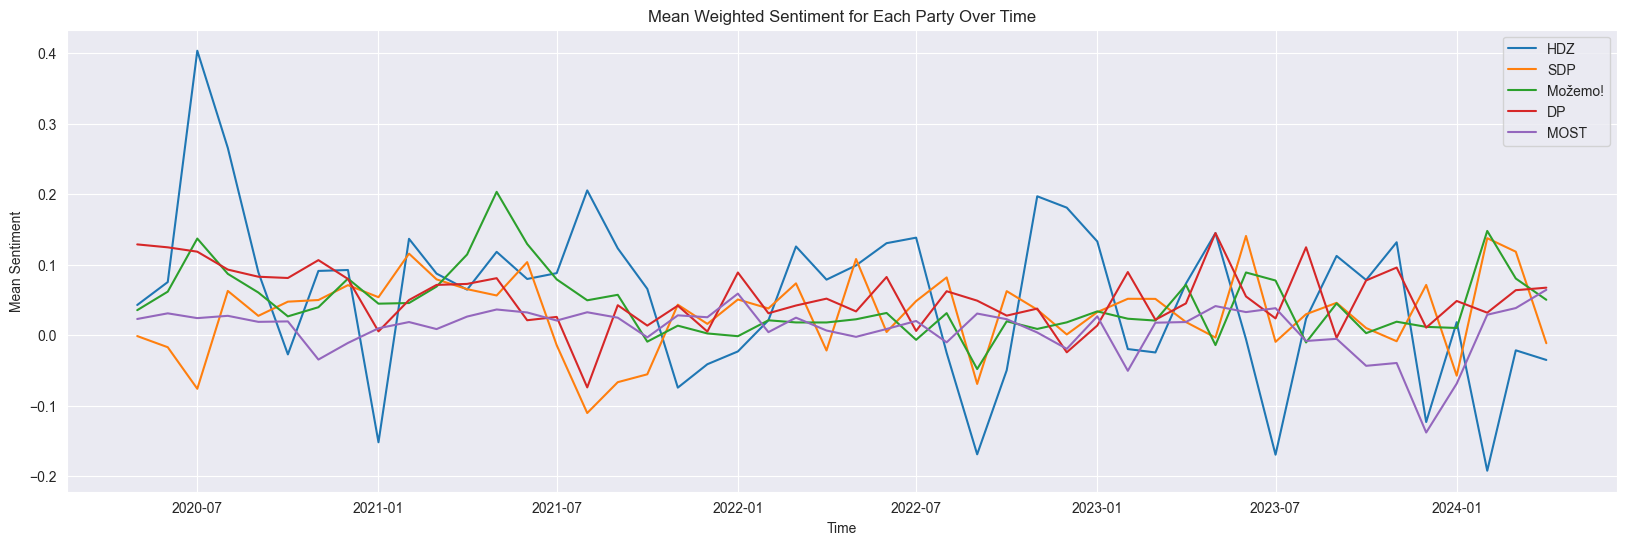

In [7]:
mean_sentiments_weighted_df['year_month'] = mean_sentiments_weighted_df['year_month'].dt.to_timestamp()

# For each party, plot a line plot of the mean sentiment over time
plt.figure(figsize=(20,6))
for party in parties:
    plt.plot(mean_sentiments_weighted_df['year_month'], mean_sentiments_weighted_df[party], label=party)

plt.title('Mean Weighted Sentiment for Each Party Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment')
plt.legend()
plt.show()

In [8]:
mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-05-01,0.124535,-0.012739,0.473684,0.465517,0.132812
1,2020-06-01,0.152344,-0.013237,0.574194,0.370370,0.184314
2,2020-07-01,0.518201,-0.092692,0.540541,0.292276,0.095238
3,2020-08-01,0.360947,0.210000,0.562500,0.344828,0.250000
4,2020-09-01,0.206452,0.126126,0.480000,0.359223,0.109756
5,2020-10-01,0.015337,0.131579,0.289474,0.280303,0.131148
6,2020-11-01,0.217073,0.107296,0.377778,0.369231,-0.247059
7,2020-12-01,0.188623,0.134694,0.355556,0.345133,-0.009615
8,2021-01-01,-0.068834,0.128405,0.390625,0.032787,0.060606
9,2021-02-01,0.220310,0.239437,0.365854,0.345794,0.120968


In [9]:
mean_sentiments_df

,year_month,HDZ,SDP,Možemo!,DP,MOST
0,2020-05-01,0.124535,-0.012739,0.473684,0.465517,0.132812
1,2020-06-01,0.152344,-0.013237,0.574194,0.370370,0.184314
2,2020-07-01,0.518201,-0.092692,0.540541,0.292276,0.095238
3,2020-08-01,0.360947,0.210000,0.562500,0.344828,0.250000
4,2020-09-01,0.206452,0.126126,0.480000,0.359223,0.109756
5,2020-10-01,0.015337,0.131579,0.289474,0.280303,0.131148
6,2020-11-01,0.217073,0.107296,0.377778,0.369231,-0.247059
7,2020-12-01,0.188623,0.134694,0.355556,0.345133,-0.009615
8,2021-01-01,-0.068834,0.128405,0.390625,0.032787,0.060606
9,2021-02-01,0.220310,0.239437,0.365854,0.345794,0.120968


In [10]:
data_df = load_and_prepare_data('../../../data/monthly-time-series/AI-izbori_stranke_krace_v2_INFL.csv', keep_columns=['NEODLUCNI', 'INFLACIJA'])
data_df.reset_index(inplace=True)
data_df.rename(columns={'index': 'year_month'}, inplace=True)
data_df

,year_month,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2024-04-01,25.4,22.5,6.9,10.8,2.7,9.2,1.0
1,2020-07-01,30.2,18.4,8.2,6.9,8.7,8.8,1.0
2,2020-08-01,33.1,16.4,7.0,6.1,8.6,9.9,1.0
3,2020-09-01,33.7,17.1,6.2,7.9,8.2,11.8,1.0
4,2020-10-01,32.5,18.7,7.3,8.4,6.7,9.9,1.0
5,2020-11-01,31.5,17.6,7.4,7.5,6.5,10.5,0.7
6,2020-12-01,30.8,16.2,8.3,9.4,8.6,5.1,0.1
7,2021-01-01,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
8,2021-02-01,30.9,17.2,8.0,6.8,9.3,13.3,0.3
9,2021-03-01,29.1,16.0,7.3,6.2,9.4,16.6,1.2


In [11]:
mean_sentiments_df.rename(columns={'HDZ': 'HDZ_senti', 'SDP': 'SDP_senti', 'DP': 'DP_senti', 'Možemo!': 'MOZEMO_senti', 'MOST': 'MOST_senti'}, inplace=True)
mean_sentiments_weighted_df.rename(columns={'HDZ': 'HDZ_senti', 'SDP': 'SDP_senti', 'DP': 'DP_senti', 'Možemo!': 'MOZEMO_senti', 'MOST': 'MOST_senti'}, inplace=True)

merged_df = pd.merge(mean_sentiments_df, data_df, on='year_month')
merged_df_weighted = pd.merge(mean_sentiments_weighted_df, data_df, on='year_month')

In [12]:
merged_df

,year_month,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-07-01,0.518201,-0.092692,0.540541,0.292276,0.095238,30.2,18.4,8.2,6.9,8.7,8.8,1.0
1,2020-08-01,0.360947,0.210000,0.562500,0.344828,0.250000,33.1,16.4,7.0,6.1,8.6,9.9,1.0
2,2020-09-01,0.206452,0.126126,0.480000,0.359223,0.109756,33.7,17.1,6.2,7.9,8.2,11.8,1.0
3,2020-10-01,0.015337,0.131579,0.289474,0.280303,0.131148,32.5,18.7,7.3,8.4,6.7,9.9,1.0
4,2020-11-01,0.217073,0.107296,0.377778,0.369231,-0.247059,31.5,17.6,7.4,7.5,6.5,10.5,0.7
5,2020-12-01,0.188623,0.134694,0.355556,0.345133,-0.009615,30.8,16.2,8.3,9.4,8.6,5.1,0.1
6,2021-01-01,-0.068834,0.128405,0.390625,0.032787,0.060606,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
7,2021-02-01,0.220310,0.239437,0.365854,0.345794,0.120968,30.9,17.2,8.0,6.8,9.3,13.3,0.3
8,2021-03-01,0.166163,0.163488,0.472727,0.323864,0.027972,29.1,16.0,7.3,6.2,9.4,16.6,1.2
9,2021-04-01,0.148496,0.129231,0.623932,0.360000,0.152381,29.3,15.1,7.7,6.6,8.7,16.8,2.1


In [13]:
merged_df_weighted

,year_month,HDZ_senti,SDP_senti,MOZEMO_senti,DP_senti,MOST_senti,HDZ,SDP,MOST,DP,MOZEMO,NEODLUCNI,INFLACIJA
0,2020-07-01,0.403349,-0.076287,0.136862,0.118255,0.023982,30.2,18.4,8.2,6.9,8.7,8.8,1.0
1,2020-08-01,0.265388,0.062563,0.086781,0.092836,0.027245,33.1,16.4,7.0,6.1,8.6,9.9,1.0
2,2020-09-01,0.089114,0.027215,0.060299,0.082711,0.018677,33.7,17.1,6.2,7.9,8.2,11.8,1.0
3,2020-10-01,-0.027481,0.047328,0.026463,0.080916,0.019338,32.5,18.7,7.3,8.4,6.7,9.9,1.0
4,2020-11-01,0.090951,0.049652,0.039443,0.106265,-0.034803,31.5,17.6,7.4,7.5,6.5,10.5,0.7
5,2020-12-01,0.092240,0.070766,0.080039,0.079551,-0.011225,30.8,16.2,8.3,9.4,8.6,5.1,0.1
6,2021-01-01,-0.152150,0.053657,0.044469,0.005145,0.009555,31.1,16.6,7.8,7.3,9.6,8.3,-0.3
7,2021-02-01,0.136513,0.115461,0.045395,0.049671,0.018421,30.9,17.2,8.0,6.8,9.3,13.3,0.3
8,2021-03-01,0.087121,0.078963,0.068765,0.071096,0.008450,29.1,16.0,7.3,6.2,9.4,16.6,1.2
9,2021-04-01,0.064379,0.065087,0.114255,0.072515,0.026176,29.3,15.1,7.7,6.6,8.7,16.8,2.1


In [14]:
print("HDZ: ", merged_df["HDZ"].corr(merged_df["HDZ_senti"]))
print("SDP: ", merged_df["SDP"].corr(merged_df["SDP_senti"]))
print("MOST: ", merged_df["MOST"].corr(merged_df["MOST_senti"]))
print("DP: ", merged_df["DP"].corr(merged_df["DP_senti"]))
print("Možemo!: ", merged_df["MOZEMO"].corr(merged_df["MOZEMO_senti"]))


HDZ:  0.3288092682872567
SDP:  0.03486084501749638
MOST:  -0.2334324404650691
DP:  0.16739857853296433
Možemo!:  0.15398599997084356


In [15]:
# TODO: možeš isključiti sentiment onih stranki koji nije koreliran s podrškama tim strankama

print("HDZ: ", merged_df_weighted["HDZ"].corr(merged_df_weighted["HDZ_senti"]))
print("SDP: ", merged_df_weighted["SDP"].corr(merged_df_weighted["SDP_senti"]))
print("MOST: ", merged_df_weighted["MOST"].corr(merged_df_weighted["MOST_senti"]))
print("DP: ", merged_df_weighted["DP"].corr(merged_df_weighted["DP_senti"]))
print("Možemo!: ", merged_df_weighted["MOZEMO"].corr(merged_df_weighted["MOZEMO_senti"]))

HDZ:  0.32259888928739705
SDP:  0.06735698146155471
MOST:  -0.06323782321109184
DP:  0.3001746452803259
Možemo!:  0.13242360579174617


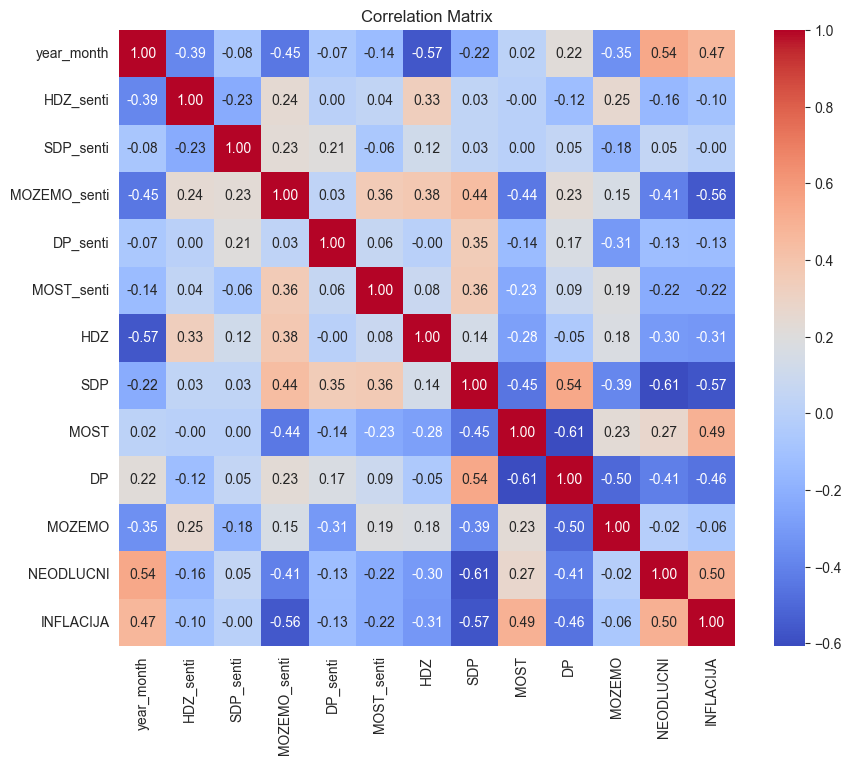

In [16]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

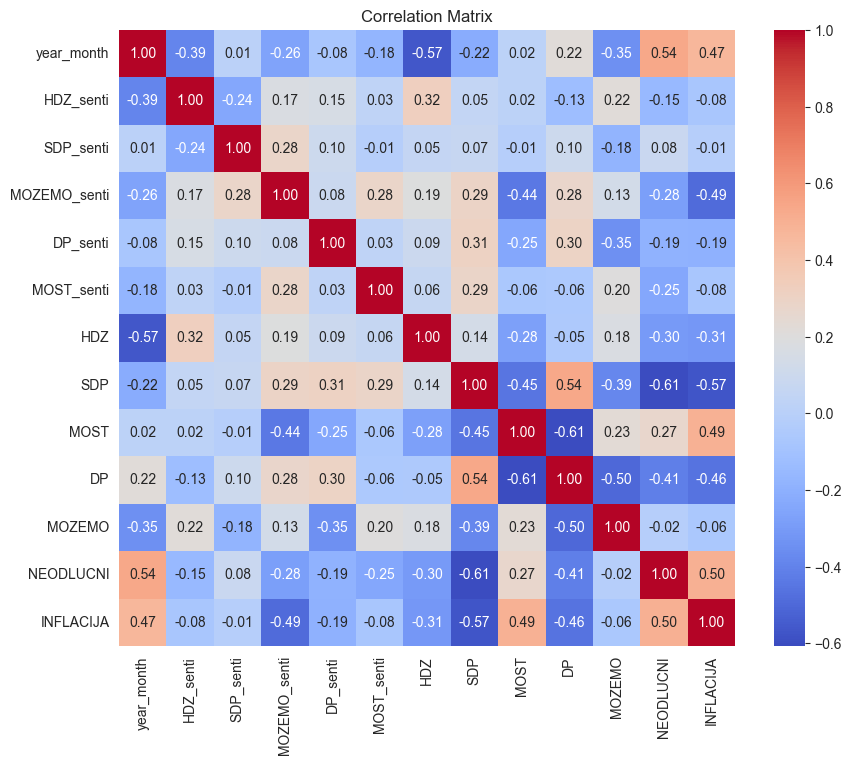

In [17]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_weighted.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
merged_df.to_csv("../../../data/monthly-time-series/full_data_normal_senti.csv")
merged_df_weighted.to_csv("../../../data/monthly-time-series/full_data_weighted_senti.csv")